In [ ]:
#Permetti di collegarci con il nostro drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Intallazione delle librerie con le relative versioni per far si che il programma venga eseguito

In [ ]:

!pip install fastcore==1.4.1


!pip install tsai==0.3.0


!pip install fastai==2.5.5


!pip install fastai2==0.0.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fastcore-1.4.1-py3-none-any.whl (56 kB)
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.4.5
    Uninstalling fastcore-1.4.5:
      Successfully uninstalled fastcore-1.4.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.4 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
# import seaborn as sns
import os.path as path
import os
# import matplotlib
# import matplotlib.font_manager
# import matplotlib.pyplot as plt # graphs plotting
# import Bio
from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline

from itertools import cycle


from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# from matplotlib import rc
# # for Arial typefont
# matplotlib.rcParams['font.family'] = 'Arial'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean


import itertools
from itertools import product

import csv

from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit

from sklearn.decomposition import KernelPCA

import timeit

import random
import matplotlib.pyplot as plt

from tsai.all import *
computer_setup()

import sys
sys.stdout = open('./output.txt', 'w')

print("Packages Loading done!!",file=sys.stderr)

Packages Loading done!!


os             : Linux-5.10.133+-x86_64-with-glibc2.27
python         : 3.8.16
tsai           : 0.3.0
fastai         : 2.5.5
fastcore       : 1.4.1
torch          : 1.10.2+cu102
n_cpus         : 2
device         : cpu


In [ ]:
#Predimao il data Set con le Sequenze varianti
seq_data = np.load("/content/drive/MyDrive/Bioinformatica/Dataset/seq_data_7000.npy")
print(seq_data[:30],file=sys.stderr)
print("lunghezza delle sequenze=",len(seq_data),file=sys.stderr)

In [ ]:
#Prendimao il data set con l'etichette delle variani relative alle sequenze di sopra
attribute_data = np.load("/content/drive/MyDrive/Bioinformatica/Dataset/seq_data_variant_names_7000.npy")
print(attribute_data[:30],file=sys.stderr)
print("lunghezza delle varianti=",len(attribute_data),file=sys.stderr)

In [ ]:
#Operazione per trasformare la sequenza di amminoacidi alfabetica in una sequenza numerica
#Assegnazione di valori interi a diversi amminoacidi in una sequenza proteica (spike).
total_int_seq = []

for i in range(len(seq_data)):
    dnaSeq = list(seq_data[i])
    res = [item.replace('A', '11') for item in dnaSeq]
    res = [item.replace('C', '10') for item in res]
    res = [item.replace('D', '9') for item in res]
    res = [item.replace('E', '8') for item in res]    
    res = [item.replace('F', '7') for item in res]
    res = [item.replace('G', '6') for item in res]
    res = [item.replace('H', '5') for item in res]    
    res = [item.replace('I', '4') for item in res]
    res = [item.replace('K', '3') for item in res]
    res = [item.replace('L', '2') for item in res]    
    res = [item.replace('M', '1') for item in res]
    res = [item.replace('N', '-1') for item in res]
    res = [item.replace('P', '-2') for item in res]    
    res = [item.replace('Q', '-3') for item in res]
    res = [item.replace('R', '-4') for item in res]
    res = [item.replace('S', '-5') for item in res]    
    res = [item.replace('T', '-6') for item in res]
    res = [item.replace('V', '-7') for item in res]
    res = [item.replace('W', '-8') for item in res]    
    res = [item.replace('X', '-9') for item in res]
    res = [item.replace('Y', '-10') for item in res]
    
    data = []
    for i in range(len(res)):
        data.append(float(res[i]))
    # print(data)
    
    total_int_seq.append(data)


    
   

In [ ]:
print(data,file=sys.stderr) 
#data definisce la riga formata da 1274 caratteri ora interi che rappresentan un determinata sequenza di amminoacidi
print(len(data),file=sys.stderr)

#total_in_seq mette contiene tutte le 7000 righe da 1274 caratteri l'uno
print(total_int_seq[:30],file=sys.stderr)
print(len(total_int_seq),file=sys.stderr)

In [ ]:
#Rifiniamo i nostri dati
#Elimino le paraentei quadre aperte e chiuse ed eventuali / nei dati della data set contenente le etichette delle varianti
attr_new = []
for i in range(len(attribute_data)):
    aa = str(attribute_data[i]).replace("[","")
    aa_1 = aa.replace("]","")
    aa_2 = aa_1.replace("\'","")
    attr_new.append(aa_2)

In [ ]:
#Mi facio stampare i primi 30 elemnti del data Set contenente le etichette delle varianti es B.1.1.1 e la variant che corrisponde alla prima sequenza del  primo data set
print(attr_new[:30],file=sys.stderr)
print(len(attr_new),file=sys.stderr)

In [ ]:
#Mi identifica quante varinti distinte ci sono nel dataSet seq_data_variant_names_7000.npy
unique_hst = list(np.unique(attr_new))
print(unique_hst,file=sys.stderr)

print("numero vrianti trovate=",len(unique_hst),file=sys.stderr)

In [ ]:
#Mi indica ogni variante che trova nel data set a quale indice corrisponde nell'allarry unique creato sopra
int_hosts = [] 
for ind_unique in range(len(attr_new)):
    variant_tmp = attr_new[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp) 


print(attr_new,file=sys.stderr)
print(int_hosts,file=sys.stderr)
print("Array UNIQUE",unique_hst,file=sys.stderr)
print(len(int_hosts),file=sys.stderr)
print("es B.1.1.7 si trova nella senta posiszione dell'array unique",file=sys.stderr)


In [ ]:
#defiiamo una prima funzione per farci stamare delle statistiche succcesivaente
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"): #prende in input la classe attuale e la classe da predirrre 

    unique_class = set(actual_class)
    print("Le classe unica è=",unique_class,file=sys.stderr)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creazione di un elenco di tutte le classi tranne la classe corrente
        other_class = [x for x in unique_class if x != per_class]
        print("Le altre classi sono=",other_class,file=sys.stderr)

        #contrassegna la classe corrente come 1 e tutte le altre classi come 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        print("La nuova classe è=",new_actual_class,file=sys.stderr)

        new_pred_class = [0 if x in other_class else 1 for x in pred_class]
        print("La nuova classe da predirre è=",new_pred_class,file=sys.stderr)

        #utilizzando il metodo delle metriche sklearn per calcolare il punteggio roc_auc l'aria sottesa sotto la curva
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
    
    
    check = pd.DataFrame(roc_auc_dict.items())
    print("Stampa del check=",check,file=sys.stderr)
    return mean(check)

In [ ]:
#definiamo una seconda funzione che chiama quella di sopra sempre per avere informazioni successivamente sulla precisione accuracy del nostro modello
def fun_accrs(actual_class, pred_class):
    y_test = actual_class[:]
    y_pred = pred_class[:]

    dt_acc = metrics.accuracy_score(y_test, y_pred) #Nella classificazione multietichetta, questa funzione calcola l'accuratezza del sottoinsieme:
    dt_prec = metrics.precision_score(y_test, y_pred,average='weighted')#Calcola la precisione.La precisione è il rapporto dove è il numero di veri positivi e il numero di falsi positivi. La precisione è intuitivamente la capacità del classificatore di non etichettare come positivo un campione negativo.
    dt_recall = metrics.recall_score(y_test, y_pred,average='weighted')#Calcola il richiamo.Il richiamo è il rapporto dove è il numero di veri positivi e il numero di falsi negativi. Il richiamo è intuitivamente la capacità del classificatore di trovare tutti i campioni positivi
    dt_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted') #alcola il punteggio F1, noto anche come punteggio F bilanciato o misura F. Il punteggio F1 può essere interpretato come una media armonica della precisione e del richiamo, dove un punteggio F1 raggiunge il suo valore migliore a 1 e il punteggio peggiore a 0
    dt_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
    dt_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_pred, average='macro')

    check = [dt_acc,dt_prec,dt_recall,dt_f1_weighted,dt_f1_macro,dt_f1_micro,macro_roc_auc_ovo[1]]

    return(check)

In [ ]:
#Effettuo delle print f di conrollo
com_sum_full_data = []
print("data set trasformato in numeri",file=sys.stderr)
print(total_int_seq[:30],file=sys.stderr)
print(len(total_int_seq),file=sys.stderr)


#Facco la somma cumulata dei valori presenti in ogni sequenza
for i in range(len(total_int_seq)):
    com_sum_full_data.append(np.cumsum(total_int_seq[i])) #cumulative sum indica il nostro segnale

y_val = int_hosts[:]
print("Mi indica ogni variante che trova nel data set a quale indice corrisponde nell'allarry unique creato sopra",file=sys.stderr)
print(y_val,file=sys.stderr)
print(len(y_val),file=sys.stderr)

print("Somma cumulata dei dati sopra convertiti in numeri",com_sum_full_data[10],file=sys.stderr)

In [ ]:
#Creamo una matrice dove aseegnamo a ogni riga la somma cumulata degli numeri che vi erano all'interno
Xx= np.array(com_sum_full_data) #Crea una matrice della somma cumulata.
y = np.array(y_val) #Crea una matrice indice di corrispondenza per gli indici associati all'array unique.

print(Xx,file=sys.stderr)
print("indici di corrispondenza alle varianti",y,file=sys.stderr)

In [ ]:
#Stampe di prova
print(Xx.shape[0],file=sys.stderr) #righe
print(Xx.shape[1],file=sys.stderr) #1274 colonne
aa = Xx.reshape((Xx.shape[0],1, Xx.shape[1]))#Dà una nuova forma alla matrcie senza modificarne i dati li mette tutti su una riga.
print(aa[:1],file=sys.stderr)
X = aa[:]
print(X,file=sys.stderr)

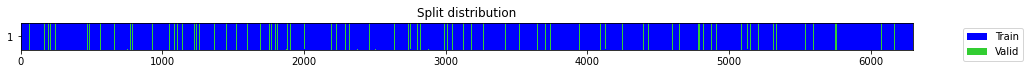

([5994, 252, 208, 2304, 3815, 2701, 1412, 679, 1755, 1181, 3081, 2629, 5648, 3710, 17, 4928, 1620, 2420, 3044, 3556, 2038, 4643, 6012, 4618, 5080, 5772, 5811, 1329, 1386, 2114, 4969, 6289, 3004, 2555, 890, 2635, 1896, 4296, 3530, 2029, 5890, 6231, 1750, 1352, 5763, 4424, 4925, 3809, 5188, 1410, 3162, 4190, 5511, 224, 4596, 6260, 6293, 1038, 4160, 975, 3419, 5752, 4893, 3722, 5953, 5942, 2056, 3261, 5984, 3198, 2312, 714, 627, 5981, 4650, 2514, 6036, 1220, 3627, 4504, 1929, 5042, 2762, 3022, 3635, 3308, 6013, 6094, 5326, 2838, 949, 2663, 4711, 6148, 4663, 6147, 5381, 4380, 5151, 6149, 5118, 5191, 2479, 1753, 1100, 1876, 5304, 1933, 192, 3010, 1298, 3062, 1025, 392, 5642, 792, 169, 1680, 4497, 442, 2102, 1413, 1839, 5390, 3029, 2688, 333, 3161, 5645, 1848, 1472, 2404, 4921, 2072, 891, 830, 1806, 5796, 4972, 3696, 3183, 995, 4346, 1883, 4388, 3685, 3376, 1431, 3844, 3096, 3772, 257, 4175, 4238, 3848, 5142, 5724, 4644, 1528, 5647, 4378, 4942, 3574, 3229, 5573, 4241, 6002, 918, 4137, 3427, 

In [ ]:
#Divide causalmente i nostri dati in train set e validation set
#Restituisce una divisione del set di dati.
splits_new_2 = get_splits(np.array(y), valid_size=.10, random_state=23, stratify=True) #Y è una matriceindice di corrispondenza per gli indici associati all'array unique. estrae randomicamente dei test di validazione contenente le serie temporali che dobbiamo dividere
#valid size dimensione del set di test
print(splits_new_2,file=sys.stderr)

In [ ]:
print(np.array(y),file=sys.stderr) #qua sappiamo che il primo elemento corrisponde alla 6 classe e così via

[ 6  6  6 ... 18  1  6]


In [ ]:
#Dividiamo i dati di test con quelli di train in base alla separazione fatta sopra ed effettuo edlle stampe di controllo
X_train = X[splits_new_2[0]] #prende i valori della somma culumata che corrispondono a quelli di train set
y_train = y[splits_new_2[0]] #prende le varie varianti del train set
X_test = X[splits_new_2[1]] #prende i valori della somma cumulata che nella divisione precedente corrispondevano a quelli di test
y_test = y[splits_new_2[1]]
print("X_train",X_train,file=sys.stderr) 
print("lunghezza X_train",len(X_train),file=sys.stderr)
print("y_train",y_train,file=sys.stderr)
print("lunghezza y_train",len(y_train),file=sys.stderr)

print("X_test",X_test,file=sys.stderr)
print("lunghezza X_test",len(X_test),file=sys.stderr)
print("y_test",y_test,file=sys.stderr)
print("lunghezza y_test",len(y_test),file=sys.stderr)

In [ ]:
#Abbiamo assegnato la suddiviso dei nostri dati alle varabili X e y
X = X_train[:]
y = y_train[:]

print("X",X,file=sys.stderr)
print("lunghezza X",len(X),file=sys.stderr)
print("y",y,file=sys.stderr)
print("lunghezza y",len(y),file=sys.stderr)

In [ ]:
#mi faccio ristampare il numero di varianti trovate nel data set
unique_labels = len(np.unique(y_val))
print("unique_labels",unique_labels,file=sys.stderr)

In [ ]:
 #di solito si utilizza un elemento tfm per trasformare y in categorie
tfms = [None, Categorize()]
print("tfms",tfms,file=sys.stderr)

In [ ]:
#Trasformare una serie temprale in immmagine, sono presenti alcuni doppioni percgè vogliamo visualizzare come cambiano al cambiare delle cmap assegnati(colorazioni che deve prendere durante la trasformazione in immagine)
bts = [[TSNormalize(), TSToPlot()], ##
       [TSNormalize(), TSToMat(cmap='viridis')],##
       [TSNormalize(), TSToGADF(cmap='tab20b')],#
       [TSNormalize(), TSToGADF(cmap='spring')],
       [TSNormalize(), TSToGASF(cmap='summer')],#
       [TSNormalize(), TSToMTF(cmap='autumn')],
       [TSNormalize(), TSToMTF(cmap='tab20b')],
       [TSNormalize(), TSToMTF(cmap='Set1')],
       [TSNormalize(), TSToJRP(cmap='Set3')],###
       [TSNormalize(), TSToMTF(cmap='binary')], #
       [TSNormalize(), TSToRP(cmap='tab20c')]]##

print("bts",bts,file=sys.stderr)

bts [[TSNormalize(by_sample=False, by_var=False, by_step=False), TSToPlot:
encodes: (TSTensor,object) -> encodes
decodes: ], [TSNormalize(by_sample=False, by_var=False, by_step=False), TSToMat:
encodes: (TSTensor,object) -> encodes
decodes: ], [TSNormalize(by_sample=False, by_var=False, by_step=False), TSToGADF:
encodes: (TSTensor,object) -> encodes
decodes: ], [TSNormalize(by_sample=False, by_var=False, by_step=False), TSToGADF:
encodes: (TSTensor,object) -> encodes
decodes: ], [TSNormalize(by_sample=False, by_var=False, by_step=False), TSToGASF:
encodes: (TSTensor,object) -> encodes
decodes: ], [TSNormalize(by_sample=False, by_var=False, by_step=False), TSToMTF:
encodes: (TSTensor,object) -> encodes
decodes: ], [TSNormalize(by_sample=False, by_var=False, by_step=False), TSToMTF:
encodes: (TSTensor,object) -> encodes
decodes: ], [TSNormalize(by_sample=False, by_var=False, by_step=False), TSToMTF:
encodes: (TSTensor,object) -> encodes
decodes: ], [TSNormalize(by_sample=False, by_var=Fa

In [ ]:
#costruisco un array contenti i nomi delle trasformazioni che uso
btns = ['Plot', 'Mat', 'GADF','GADF1', 'GASF', 'MTF','MTF','MTF','JRP','MTF3','RP']
print("btns",btns,file=sys.stderr)

btns ['Plot', 'Mat', 'GADF', 'GADF1', 'GASF', 'MTF', 'MTF', 'MTF', 'JRP', 'MTF3', 'RP']


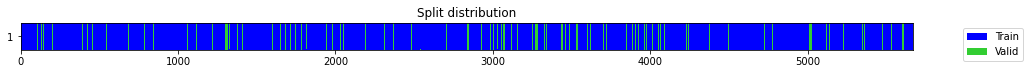

splits_new ([4358, 1882, 2075, 575, 3388, 252, 948, 345, 1042, 2430, 4365, 196, 668, 2948, 3800, 4371, 3110, 5104, 5517, 1747, 1751, 5211, 1683, 4258, 714, 123, 4429, 998, 1306, 2594, 1015, 5541, 3736, 3160, 1253, 5316, 769, 1918, 2726, 2076, 1341, 1305, 1242, 4518, 1991, 5624, 485, 2893, 3373, 5470, 5246, 2816, 996, 3315, 262, 1439, 3409, 5593, 3417, 2690, 1659, 4308, 461, 1519, 5201, 746, 4608, 4744, 1406, 2420, 3324, 5663, 4893, 2058, 3670, 3051, 3555, 2784, 1770, 4006, 1619, 5172, 1560, 1940, 2283, 3101, 686, 2661, 3010, 4138, 2316, 3080, 4884, 669, 4048, 4068, 119, 4321, 1, 358, 997, 5463, 4943, 5452, 1445, 521, 4872, 3585, 2848, 3397, 3487, 494, 634, 4753, 1327, 2897, 2949, 1640, 4671, 2219, 5180, 5351, 4976, 2591, 1301, 5431, 1916, 5414, 360, 1013, 5616, 2921, 421, 3833, 2306, 2228, 2310, 4657, 351, 950, 2885, 3696, 5290, 2540, 3515, 5062, 1867, 89, 1866, 5107, 1600, 1342, 1780, 2544, 2864, 1992, 2155, 2161, 758, 74, 700, 5380, 2852, 1900, 1326, 4611, 5432, 3663, 2004, 2078, 14,

In [ ]:
#effettuo un uteriore suddivisione dei dati in train e validation set
splits_new = get_splits(np.array(y), valid_size=.11, random_state=23, stratify=True)
print("splits_new",splits_new,file=sys.stderr)
                        

In [ ]:

#In quest parte mostriamo come i diversi modi per convertire le immagini appplicati a diversi segnali del nostro dataSet

#bts = [[TSNormalize(), TSToPlot()],[TSNormalize(), TSToMat(cmap='viridis')],[TSNormalize(), TSToGADF(cmap='spring')], [TSNormalize(), TSToGASF(cmap='summer')],[TSNormalize(), TSToMTF(cmap='autumn')],
#btns = ['Plot', 'Mat', 'GADF', 'GASF', 'MTF', 'RP']
for i, (bt, btn) in enumerate(zip(bts, btns)):
#     yy = np.random.randint(0, 2, 60)
   # X = X_train[:]
    #y = y_train[:]
    dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new) #associaimo ad ogni elemnto(sequenza) la classe di appartenenza
    print("X",X[:64],file=sys.stderr)
    print("y",y[:64],file=sys.stderr)
    print("dsets",dsets,file=sys.stderr)
    print("dsets.train",dsets.train[:64],file=sys.stderr)
    print("dsets.valid",dsets.valid[:64],file=sys.stderr)
    dls = TSDataLoaders.from_dsets(dsets.train, #carichiamo i dati
                                   dsets.valid,
                                   bs=[64, 128],
                                   batch_tfms=bt,
                                   shuffle=False)
    print("Che usa=",bt,file=sys.stderr)
    xb, yb = dls.train.one_batch() #È possibile utilizzare train_on_batchper aggiornare direttamente il modello esistente solo su tali campioni
    print(f'\n\ntfm: TSTo{btn} - batch shape: {xb.shape}',file=sys.stderr) #Quindi si può suddividere il training set in sottogruppi uniformi, chiamati batch.

    #ci facciamo stampare i risltati delle varie trasformazioni
    print("Predizione",yb[5],file=sys.stderr)
    xb[5].show()
    
    print("Predizione",yb[2],file=sys.stderr)
    xb[2].show()

    print("Predizione",yb[7],file=sys.stderr)
    xb[7].show()

    print("Predizione",yb[60],file=sys.stderr)
    xb[60].show()

    print("Predizione",yb[0],file=sys.stderr)
    xb[0].show()

    print("Predizione",yb[63],file=sys.stderr)
    xb[63].show()


   
    dls.valid
    plt.show()
    
   

In [ ]:
tfms = [None, Categorize()]
batch_tfms =  [TSStandardize()]
print("Che usa=",batch_tfms,file=sys.stderr)
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=batch_tfms)
dls.show_batch()

In [ ]:
#Effetuiamo l'addestramento sul modello inception time
epochs = 100 #100

print("Number of Epochs = ",epochs,file=sys.stderr)
model = create_model(InceptionTime, dls=dls)

# learn = Learner(dls, model, metrics=accuracy, cbs=ShowGraphCallback())
learn = Learner(dls, model, metrics=accuracy)
start = time.time()

learn.fit_one_cycle(epochs, lr_max=1e-3) #iterativamente oscilla tra un learin reate massimo e un learning rete minimo fino ad individuare uello migliore
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}",file=sys.stderr)
learn.plot_metrics()#Grafico sulle x le epoche e y i valori



#Stampa solo il valore finale della tabella di sopra che dovrebbe essere quello OTTIMO!

vals = learn.recorder.values[-1]
results= [vals[0], vals[1], vals[2]]
final_results = pd.DataFrame(results).T
final_results.columns = ["train loss","valid loss","accuracy"]

display(final_results)


In [ ]:
#Ci facciamo stampare 9 risultati
learn.show_results()

In [ ]:
#learn.save('/content/drive/MyDrive/Bioinformatica/ModelloEF.h5') #usiamo questo se vogliamo salvare il nostro modello

#Facciamo queste due operazioni per riprendercelo
#learn = Learner(dls, model, metrics=accuracy)
#learn.load('/content/drive/MyDrive/Bioinformatica/ModelloEF.h5')

In [ ]:
########################## Evaluation Metrics (Start) ###########################   
#Questo codice permette di estrarre delle metriche in base all'addestramento fatto in precedednza richimando le due funzioni definite sopra
test_probas3, test_targets3, test_preds3, test_losses3 = learn.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)
#test_probas32, test_targets32, test_preds32, test_losses32 = learn2.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)


#print("Contenuto test_preds3", test_preds3, file=sys.stderr)




#print("Lunghezza test_preds3", len(test_preds3), file=sys.stderr)


lista = list()
numero=0
for char in test_preds3:
    if char.isdigit():
        numero=numero*10+int(char)
    if char == ',' or char== ']':
        lista.append(numero)
        numero=0;


# test_targets3
aa = pd.DataFrame(lista)
print("Contenuto test_preds3 convertito in data frame", aa, file=sys.stderr)
# aa.drop("]", axis=0)
aa.columns = ["name"]
aa = aa.loc[aa["name"] != "["]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != " "]
aa = aa.loc[aa["name"] != "]"]
# aa
# test_preds3
print("Contenuto test_preds3 convertito in data frame dopo modifiche", aa, file=sys.stderr)
print("Lunghezza test_preds3 convertito in data frame dopo modifiche", len(aa), file=sys.stderr)

asd = (aa.values.tolist())
final_pred_vals = []
for i in range(len(asd)):
    temp = asd[i]
    temp_1 = str(temp).replace("\'","")
    temp_2 = str(temp_1).replace("[","")
    temp_3 = int(str(temp_2).replace("]",""))
    final_pred_vals.append(temp_3)

print("Contenuto final_pred_vals", final_pred_vals, file=sys.stderr)
print("lunghezza final_pred_vals", len(final_pred_vals), file=sys.stderr)

print("Contenuto test_preds3", test_preds3, file=sys.stderr)

tmp_lst = list(test_targets3)
final_org_vals = []
for i in range(len(tmp_lst)):
    temp = str(tmp_lst[i])
    temp_1 = str(temp).replace("TensorCategory(","")
    temp_2 = int(str(temp_1).replace(")",""))
    final_org_vals.append(temp_2)


dt_table = []
dt_return = fun_accrs(final_org_vals,final_pred_vals)
dt_table.append(dt_return)

dt_table_final = DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

print(dt_table_final, file=sys.stderr)
########################## Evaluation Metrics (End) ###########################



In [ ]:
################################ TSToPlot (Start) ###################################
#Effuiamo l'addetramento su TSTPlot
print("TSToPlot Start",file=sys.stderr)

tfms = [None, Categorize()]
batch_tfms = [TSNormalize(), TSToPlot()]
# dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=batch_tfms)
dls.show_batch()

model = create_model(xresnet34, dls=dls)
learn = Learner(dls, model, metrics=accuracy)
start = time.time()
learn.fit_one_cycle(epochs, lr_max=1e-3)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}")
learn.plot_metrics()

vals = learn.recorder.values[-1]
results= [vals[0], vals[1], vals[2]]
# results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
# clear_output()
# final_results = np.array(results).to_frame().T
final_results = pd.DataFrame(results).T
final_results.columns = ["train loss","valid loss","accuracy"]
display(final_results)

In [ ]:
########################## Evaluation Metrics (Start) ###########################   
#Questo codice permette di estrarre delle metriche in base all'addestramento fatto in precedednza richimando le due funzioni definite sopra
test_probas3, test_targets3, test_preds3, test_losses3 = learn.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)
#test_probas32, test_targets32, test_preds32, test_losses32 = learn2.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)


#print("Contenuto test_preds3", test_preds3, file=sys.stderr)




#print("Lunghezza test_preds3", len(test_preds3), file=sys.stderr)


lista = list()
numero=0
for char in test_preds3:
    if char.isdigit():
        numero=numero*10+int(char)
    if char == ',' or char== ']':
        lista.append(numero)
        numero=0;


# test_targets3
aa = pd.DataFrame(lista)
print("Contenuto test_preds3 convertito in data frame", aa, file=sys.stderr)
# aa.drop("]", axis=0)
aa.columns = ["name"]
aa = aa.loc[aa["name"] != "["]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != " "]
aa = aa.loc[aa["name"] != "]"]
# aa
# test_preds3
print("Contenuto test_preds3 convertito in data frame dopo modifiche", aa, file=sys.stderr)
print("Lunghezza test_preds3 convertito in data frame dopo modifiche", len(aa), file=sys.stderr)

asd = (aa.values.tolist())
final_pred_vals = []
for i in range(len(asd)):
    temp = asd[i]
    temp_1 = str(temp).replace("\'","")
    temp_2 = str(temp_1).replace("[","")
    temp_3 = int(str(temp_2).replace("]",""))
    final_pred_vals.append(temp_3)

print("Contenuto final_pred_vals", final_pred_vals, file=sys.stderr)
print("lunghezza final_pred_vals", len(final_pred_vals), file=sys.stderr)

print("Contenuto test_preds3", test_preds3, file=sys.stderr)

tmp_lst = list(test_targets3)
final_org_vals = []
for i in range(len(tmp_lst)):
    temp = str(tmp_lst[i])
    temp_1 = str(temp).replace("TensorCategory(","")
    temp_2 = int(str(temp_1).replace(")",""))
    final_org_vals.append(temp_2)


dt_table = []
dt_return = fun_accrs(final_org_vals,final_pred_vals)
dt_table.append(dt_return)

dt_table_final = DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

print(dt_table_final, file=sys.stderr)
########################## Evaluation Metrics (End) ###########################



In [ ]:
#Effuiamo l'addetramento su TSToMAT
tfms = [None, Categorize()]
batch_tfms = [TSNormalize(), TSToMat()]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=batch_tfms)
dls.show_batch()
xb, yb = dls.train.one_batch()
print(f'\n\ntfm: TSToMAT - batch shape: {xb.shape}',file=sys.stderr)
xb[0].show()
len(xb)

model = create_model(xresnet34, dls=dls, pretrained=True)
print("Pretrained XResnet34 model",file=sys.stderr)
learn = Learner(dls, model, metrics=accuracy)
start = time.time()
learn.fit_one_cycle(100, lr_max=1e-3)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}",file=sys.stderr)
learn.plot_metrics()

vals = learn.recorder.values[-1]
results= [vals[0], vals[1], vals[2]]
# results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
# clear_output()
# final_results = np.array(results).to_frame().T
final_results = pd.DataFrame(results).T
final_results.columns = ["train loss","valid loss","accuracy"]
display(final_results)

In [ ]:
########################## Evaluation Metrics (Start) ###########################   
#Questo codice permette di estrarre delle metriche in base all'addestramento fatto in precedednza richimando le due funzioni definite sopra
test_probas3, test_targets3, test_preds3, test_losses3 = learn.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)
#test_probas32, test_targets32, test_preds32, test_losses32 = learn2.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)


#print("Contenuto test_preds3", test_preds3, file=sys.stderr)




#print("Lunghezza test_preds3", len(test_preds3), file=sys.stderr)


lista = list()
numero=0
for char in test_preds3:
    if char.isdigit():
        numero=numero*10+int(char)
    if char == ',' or char== ']':
        lista.append(numero)
        numero=0;


# test_targets3
aa = pd.DataFrame(lista)
print("Contenuto test_preds3 convertito in data frame", aa, file=sys.stderr)
# aa.drop("]", axis=0)
aa.columns = ["name"]
aa = aa.loc[aa["name"] != "["]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != " "]
aa = aa.loc[aa["name"] != "]"]
# aa
# test_preds3
print("Contenuto test_preds3 convertito in data frame dopo modifiche", aa, file=sys.stderr)
print("Lunghezza test_preds3 convertito in data frame dopo modifiche", len(aa), file=sys.stderr)

asd = (aa.values.tolist())
final_pred_vals = []
for i in range(len(asd)):
    temp = asd[i]
    temp_1 = str(temp).replace("\'","")
    temp_2 = str(temp_1).replace("[","")
    temp_3 = int(str(temp_2).replace("]",""))
    final_pred_vals.append(temp_3)

print("Contenuto final_pred_vals", final_pred_vals, file=sys.stderr)
print("lunghezza final_pred_vals", len(final_pred_vals), file=sys.stderr)

print("Contenuto test_preds3", test_preds3, file=sys.stderr)

tmp_lst = list(test_targets3)
final_org_vals = []
for i in range(len(tmp_lst)):
    temp = str(tmp_lst[i])
    temp_1 = str(temp).replace("TensorCategory(","")
    temp_2 = int(str(temp_1).replace(")",""))
    final_org_vals.append(temp_2)


dt_table = []
dt_return = fun_accrs(final_org_vals,final_pred_vals)
dt_table.append(dt_return)

dt_table_final = DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

print(dt_table_final, file=sys.stderr)
########################## Evaluation Metrics (End) ###########################



In [ ]:
#Effuiamo l'addetramento su TSToGASF
print("Time Series to GASF Start",file=sys.stderr)

tfms = [None, Categorize()]
batch_tfms = [TSNormalize(), TSToGASF()]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=batch_tfms)
dls.show_batch()

model = create_model(xresnet34, dls=dls)
learn = Learner(dls, model, metrics=accuracy)
start = time.time()
learn.fit_one_cycle(100, lr_max=1e-3)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}")
learn.plot_metrics()

vals = learn.recorder.values[-1]
results= [vals[0], vals[1], vals[2]]
final_results = pd.DataFrame(results).T
final_results.columns = ["train loss","valid loss","accuracy"]
display(final_results)

In [ ]:
########################## Evaluation Metrics (Start) ###########################   
#Questo codice permette di estrarre delle metriche in base all'addestramento fatto in precedednza richimando le due funzioni definite sopra
test_probas3, test_targets3, test_preds3, test_losses3 = learn.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)
#test_probas32, test_targets32, test_preds32, test_losses32 = learn2.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)


#print("Contenuto test_preds3", test_preds3, file=sys.stderr)




#print("Lunghezza test_preds3", len(test_preds3), file=sys.stderr)


lista = list()
numero=0
for char in test_preds3:
    if char.isdigit():
        numero=numero*10+int(char)
    if char == ',' or char== ']':
        lista.append(numero)
        numero=0;


# test_targets3
aa = pd.DataFrame(lista)
print("Contenuto test_preds3 convertito in data frame", aa, file=sys.stderr)
# aa.drop("]", axis=0)
aa.columns = ["name"]
aa = aa.loc[aa["name"] != "["]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != " "]
aa = aa.loc[aa["name"] != "]"]
# aa
# test_preds3
print("Contenuto test_preds3 convertito in data frame dopo modifiche", aa, file=sys.stderr)
print("Lunghezza test_preds3 convertito in data frame dopo modifiche", len(aa), file=sys.stderr)

asd = (aa.values.tolist())
final_pred_vals = []
for i in range(len(asd)):
    temp = asd[i]
    temp_1 = str(temp).replace("\'","")
    temp_2 = str(temp_1).replace("[","")
    temp_3 = int(str(temp_2).replace("]",""))
    final_pred_vals.append(temp_3)

print("Contenuto final_pred_vals", final_pred_vals, file=sys.stderr)
print("lunghezza final_pred_vals", len(final_pred_vals), file=sys.stderr)

print("Contenuto test_preds3", test_preds3, file=sys.stderr)

tmp_lst = list(test_targets3)
final_org_vals = []
for i in range(len(tmp_lst)):
    temp = str(tmp_lst[i])
    temp_1 = str(temp).replace("TensorCategory(","")
    temp_2 = int(str(temp_1).replace(")",""))
    final_org_vals.append(temp_2)


dt_table = []
dt_return = fun_accrs(final_org_vals,final_pred_vals)
dt_table.append(dt_return)

dt_table_final = DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

print(dt_table_final, file=sys.stderr)
########################## Evaluation Metrics (End) ###########################



In [ ]:
#Effuiamo l'addetramento su TSToGASF
print("Time Series to GADF Start",file=sys.stderr)

tfms = [None, Categorize()]
batch_tfms = [TSNormalize(), TSToGADF()]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=batch_tfms)
dls.show_batch()

model = create_model(xresnet34, dls=dls)
learn = Learner(dls, model, metrics=accuracy)
start = time.time()
learn.fit_one_cycle(100, lr_max=1e-3)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}")
learn.plot_metrics()

vals = learn.recorder.values[-1]
results= [vals[0], vals[1], vals[2]]
final_results = pd.DataFrame(results).T
final_results.columns = ["train loss","valid loss","accuracy"]
display(final_results)

In [ ]:
########################## Evaluation Metrics (Start) ###########################   
#Questo codice permette di estrarre delle metriche in base all'addestramento fatto in precedednza richimando le due funzioni definite sopra
test_probas3, test_targets3, test_preds3, test_losses3 = learn.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)
#test_probas32, test_targets32, test_preds32, test_losses32 = learn2.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)


#print("Contenuto test_preds3", test_preds3, file=sys.stderr)




#print("Lunghezza test_preds3", len(test_preds3), file=sys.stderr)


lista = list()
numero=0
for char in test_preds3:
    if char.isdigit():
        numero=numero*10+int(char)
    if char == ',' or char== ']':
        lista.append(numero)
        numero=0;


# test_targets3
aa = pd.DataFrame(lista)
print("Contenuto test_preds3 convertito in data frame", aa, file=sys.stderr)
# aa.drop("]", axis=0)
aa.columns = ["name"]
aa = aa.loc[aa["name"] != "["]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != " "]
aa = aa.loc[aa["name"] != "]"]
# aa
# test_preds3
print("Contenuto test_preds3 convertito in data frame dopo modifiche", aa, file=sys.stderr)
print("Lunghezza test_preds3 convertito in data frame dopo modifiche", len(aa), file=sys.stderr)

asd = (aa.values.tolist())
final_pred_vals = []
for i in range(len(asd)):
    temp = asd[i]
    temp_1 = str(temp).replace("\'","")
    temp_2 = str(temp_1).replace("[","")
    temp_3 = int(str(temp_2).replace("]",""))
    final_pred_vals.append(temp_3)

print("Contenuto final_pred_vals", final_pred_vals, file=sys.stderr)
print("lunghezza final_pred_vals", len(final_pred_vals), file=sys.stderr)

print("Contenuto test_preds3", test_preds3, file=sys.stderr)

tmp_lst = list(test_targets3)
final_org_vals = []
for i in range(len(tmp_lst)):
    temp = str(tmp_lst[i])
    temp_1 = str(temp).replace("TensorCategory(","")
    temp_2 = int(str(temp_1).replace(")",""))
    final_org_vals.append(temp_2)


dt_table = []
dt_return = fun_accrs(final_org_vals,final_pred_vals)
dt_table.append(dt_return)

dt_table_final = DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

print(dt_table_final, file=sys.stderr)
########################## Evaluation Metrics (End) ###########################



In [ ]:
#Effuiamo l'addetramento su TSToMTF
tfms = [None, Categorize()]
batch_tfms =[TSNormalize(), TSToMTF()]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=batch_tfms)
dls.show_batch()
xb, yb = dls.train.one_batch()
print(f'\n\ntfm: TSToMAT - batch shape: {xb.shape}',file=sys.stderr)
xb[0].show()

len(xb)

model = create_model(xresnet34, dls=dls, pretrained=True)
print("Pretrained XResnet34 model",file=sys.stderr)
learn = Learner(dls, model, metrics=accuracy)
start = time.time()
learn.fit_one_cycle(100, lr_max=1e-3)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}",file=sys.stderr)
learn.plot_metrics()

vals = learn.recorder.values[-1]
results= [vals[0], vals[1], vals[2]]
# results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
# clear_output()
# final_results = np.array(results).to_frame().T
final_results = pd.DataFrame(results).T
final_results.columns = ["train loss","valid loss","accuracy"]
display(final_results)

In [ ]:
########################## Evaluation Metrics (Start) ###########################   
#Questo codice permette di estrarre delle metriche in base all'addestramento fatto in precedednza richimando le due funzioni definite sopra
test_probas3, test_targets3, test_preds3, test_losses3 = learn.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)
#test_probas32, test_targets32, test_preds32, test_losses32 = learn2.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)


#print("Contenuto test_preds3", test_preds3, file=sys.stderr)




#print("Lunghezza test_preds3", len(test_preds3), file=sys.stderr)


lista = list()
numero=0
for char in test_preds3:
    if char.isdigit():
        numero=numero*10+int(char)
    if char == ',' or char== ']':
        lista.append(numero)
        numero=0;


# test_targets3
aa = pd.DataFrame(lista)
print("Contenuto test_preds3 convertito in data frame", aa, file=sys.stderr)
# aa.drop("]", axis=0)
aa.columns = ["name"]
aa = aa.loc[aa["name"] != "["]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != " "]
aa = aa.loc[aa["name"] != "]"]
# aa
# test_preds3
print("Contenuto test_preds3 convertito in data frame dopo modifiche", aa, file=sys.stderr)
print("Lunghezza test_preds3 convertito in data frame dopo modifiche", len(aa), file=sys.stderr)

asd = (aa.values.tolist())
final_pred_vals = []
for i in range(len(asd)):
    temp = asd[i]
    temp_1 = str(temp).replace("\'","")
    temp_2 = str(temp_1).replace("[","")
    temp_3 = int(str(temp_2).replace("]",""))
    final_pred_vals.append(temp_3)

print("Contenuto final_pred_vals", final_pred_vals, file=sys.stderr)
print("lunghezza final_pred_vals", len(final_pred_vals), file=sys.stderr)

print("Contenuto test_preds3", test_preds3, file=sys.stderr)

tmp_lst = list(test_targets3)
final_org_vals = []
for i in range(len(tmp_lst)):
    temp = str(tmp_lst[i])
    temp_1 = str(temp).replace("TensorCategory(","")
    temp_2 = int(str(temp_1).replace(")",""))
    final_org_vals.append(temp_2)


dt_table = []
dt_return = fun_accrs(final_org_vals,final_pred_vals)
dt_table.append(dt_return)

dt_table_final = DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

print(dt_table_final, file=sys.stderr)
########################## Evaluation Metrics (End) ###########################



In [ ]:
#Effuiamo l'addetramento su TSToRP
tfms = [None, Categorize()]
batch_tfms =[TSNormalize(), TSToRP()]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=batch_tfms)
dls.show_batch()
xb, yb = dls.train.one_batch()
print(f'\n\ntfm: TSToMAT - batch shape: {xb.shape}',file=sys.stderr)
xb[0].show()

len(xb)

model = create_model(xresnet34, dls=dls, pretrained=True)
print("Pretrained XResnet34 model",file=sys.stderr)
learn = Learner(dls, model, metrics=accuracy)
start = time.time()
learn.fit_one_cycle(100, lr_max=1e-3)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}",file=sys.stderr)
learn.plot_metrics()

vals = learn.recorder.values[-1]
results= [vals[0], vals[1], vals[2]]
# results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
# clear_output()
# final_results = np.array(results).to_frame().T
final_results = pd.DataFrame(results).T
final_results.columns = ["train loss","valid loss","accuracy"]
display(final_results)

In [ ]:
########################## Evaluation Metrics (Start) ###########################   
#Questo codice permette di estrarre delle metriche in base all'addestramento fatto in precedednza richimando le due funzioni definite sopra
test_probas3, test_targets3, test_preds3, test_losses3 = learn.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)
#test_probas32, test_targets32, test_preds32, test_losses32 = learn2.get_X_preds(X_test, y_test, with_loss=True, with_decoded=True)


#print("Contenuto test_preds3", test_preds3, file=sys.stderr)




#print("Lunghezza test_preds3", len(test_preds3), file=sys.stderr)


lista = list()
numero=0
for char in test_preds3:
    if char.isdigit():
        numero=numero*10+int(char)
    if char == ',' or char== ']':
        lista.append(numero)
        numero=0;


# test_targets3
aa = pd.DataFrame(lista)
print("Contenuto test_preds3 convertito in data frame", aa, file=sys.stderr)
# aa.drop("]", axis=0)
aa.columns = ["name"]
aa = aa.loc[aa["name"] != "["]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != ","]
aa = aa.loc[aa["name"] != " "]
aa = aa.loc[aa["name"] != "]"]
# aa
# test_preds3
print("Contenuto test_preds3 convertito in data frame dopo modifiche", aa, file=sys.stderr)
print("Lunghezza test_preds3 convertito in data frame dopo modifiche", len(aa), file=sys.stderr)

asd = (aa.values.tolist())
final_pred_vals = []
for i in range(len(asd)):
    temp = asd[i]
    temp_1 = str(temp).replace("\'","")
    temp_2 = str(temp_1).replace("[","")
    temp_3 = int(str(temp_2).replace("]",""))
    final_pred_vals.append(temp_3)

print("Contenuto final_pred_vals", final_pred_vals, file=sys.stderr)
print("lunghezza final_pred_vals", len(final_pred_vals), file=sys.stderr)

print("Contenuto test_preds3", test_preds3, file=sys.stderr)

tmp_lst = list(test_targets3)
final_org_vals = []
for i in range(len(tmp_lst)):
    temp = str(tmp_lst[i])
    temp_1 = str(temp).replace("TensorCategory(","")
    temp_2 = int(str(temp_1).replace(")",""))
    final_org_vals.append(temp_2)


dt_table = []
dt_return = fun_accrs(final_org_vals,final_pred_vals)
dt_table.append(dt_return)

dt_table_final = DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

print(dt_table_final, file=sys.stderr)
########################## Evaluation Metrics (End) ###########################

Quello che andimao a fare ora è usare semre i metod di rappresentazione sopra visti, pero andando a definire un cmap(colore) per vedere se l'aggiunta di tale parametro migliora il nostro risultato

In [ ]:
#Effuiamo l'addetramento su TSToMTF con 'aggiunta del valore cmap="tab20b"
tfms = [None, Categorize()]
batch_tfms =[TSNormalize(), TSToMTF(cmap='tab20b')]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=batch_tfms)
dls.show_batch()
xb, yb = dls.train.one_batch()
print(f'\n\ntfm: TSToMAT - batch shape: {xb.shape}',file=sys.stderr)
xb[0].show()

len(xb)

model = create_model(xresnet34, dls=dls, pretrained=True)
print("Pretrained XResnet34 model",file=sys.stderr)
learn = Learner(dls, model, metrics=accuracy)
start = time.time()
learn.fit_one_cycle(100, lr_max=1e-3)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}",file=sys.stderr)
learn.plot_metrics()

vals = learn.recorder.values[-1]
results= [vals[0], vals[1], vals[2]]
# results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
# clear_output()
# final_results = np.array(results).to_frame().T
final_results = pd.DataFrame(results).T
final_results.columns = ["train loss","valid loss","accuracy"]
display(final_results)

In [ ]:
#Effuiamo l'addetramento su TSToMTF con 'aggiunta del valore cmap="gray"
tfms = [None, Categorize()]
batch_tfms =[TSNormalize(), TSToMTF(cmap='gray')]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=batch_tfms)
dls.show_batch()
xb, yb = dls.train.one_batch()
print(f'\n\ntfm: TSToMAT - batch shape: {xb.shape}',file=sys.stderr)
xb[0].show()

len(xb)

model = create_model(xresnet34, dls=dls, pretrained=True)
print("Pretrained XResnet34 model",file=sys.stderr)
learn = Learner(dls, model, metrics=accuracy)
start = time.time()
learn.fit_one_cycle(100, lr_max=1e-3)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}",file=sys.stderr)
learn.plot_metrics()

vals = learn.recorder.values[-1]
results= [vals[0], vals[1], vals[2]]
# results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
# clear_output()
# final_results = np.array(results).to_frame().T
final_results = pd.DataFrame(results).T
final_results.columns = ["train loss","valid loss","accuracy"]
display(final_results)

In [ ]:
#Effuiamo l'addetramento su TSToRP con 'aggiunta del valore cmap="gray"
tfms = [None, Categorize()]
batch_tfms =[TSNormalize(), TSToRP(cmap='gray')]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=batch_tfms)
dls.show_batch()
xb, yb = dls.train.one_batch()
print(f'\n\ntfm: TSToMAT - batch shape: {xb.shape}',file=sys.stderr)
xb[0].show()

len(xb)

model = create_model(xresnet34, dls=dls, pretrained=True)
print("Pretrained XResnet34 model",file=sys.stderr)
learn = Learner(dls, model, metrics=accuracy)
start = time.time()
learn.fit_one_cycle(100, lr_max=1e-3)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}",file=sys.stderr)
learn.plot_metrics()

vals = learn.recorder.values[-1]
results= [vals[0], vals[1], vals[2]]
# results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
# clear_output()
# final_results = np.array(results).to_frame().T
final_results = pd.DataFrame(results).T
final_results.columns = ["train loss","valid loss","accuracy"]
display(final_results)

In [ ]:
#Effuiamo l'addetramento su TSToJRP che lavora su più serie temporali, in questonostro cano ne abbiaoauna ma eseguendolo abbiamo riscontrto risultati migliri rispetto alla RP normale
tfms = [None, Categorize()]
batch_tfms =[TSNormalize(), TSToJRP(cmap='gray')]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=batch_tfms)
dls.show_batch()
xb, yb = dls.train.one_batch()
print(f'\n\ntfm: TSToMAT - batch shape: {xb.shape}',file=sys.stderr)
xb[0].show()

len(xb)

model = create_model(xresnet34, dls=dls, pretrained=True)
print("Pretrained XResnet34 model",file=sys.stderr)
learn = Learner(dls, model, metrics=accuracy)
start = time.time()
learn.fit_one_cycle(100, lr_max=1e-3)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}",file=sys.stderr)
learn.plot_metrics()

vals = learn.recorder.values[-1]
results= [vals[0], vals[1], vals[2]]
# results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
# clear_output()
# final_results = np.array(results).to_frame().T
final_results = pd.DataFrame(results).T
final_results.columns = ["train loss","valid loss","accuracy"]
display(final_results)